# CS655: PA 1 Summary

Student: Jida Li

### Methodology

- The following experiments are tested between the server on csa1.bu.edu and the client on my local machine.
- The codes of calculating RTT is in `pa1part2/client.py` file where the formula is `avg_rtt = sum(rtt_i) / probes_num`. The RTT for each probe is the time is the timestamp of sender receiving the respond from  minus the timestamp of sender's sending the message:
```(Python)

```

- The codes of calculating throughput is in `pa1part2/client.py` file where the formula is `tput = sum(rtt_msg_size_i) / total_time`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import List

def read_data(filenames: List[str], measure_name: str) -> pd.DataFrame:
    data = {}
    
    for filename in filenames:
        # Step 1: Read the data from the txt file
        lines = []
        with open(filename, 'r') as file:
            lines = file.readlines()

        # Step 2: Parse the data to extract CLIENT value and RTT  
        for line in lines:
            if line.startswith("RESULT:"):
                parts = line.split(':')[1].strip().split(',')
                
                msg_size = int(parts[0])  # message size
                value = float(parts[-1])  # rtt/tput value
                
                data.setdefault(msg_size, []).append(value)

    # Step 3: Create a pandas DataFrame for easier manipulation
    msg_size = []
    measure_ls = []
     
    for key in data.keys():
        msg_size.append(key)
        measure_ls.append(sum(data[key]) / len(data[key]))
    
    res = pd.DataFrame({
        'MSG_SIZE': msg_size,
        measure_name: measure_ls
    }) 
    
    return res

def plot_rtt(data: pd.DataFrame, yrange, delay: str):
    plt.plot(data['MSG_SIZE'], data['RTT'], marker='o')

    # Adding labels and a title
    plt.xlabel('Message Size (bytes)')
    plt.ylabel('RTT (s)')
    plt.title(f'Message Size vs Roundtrip Time with {delay}s Delay')
    
    plt.ylim(yrange[0], yrange[1])
    plt.grid(True)
    
    for i in range(len(data['MSG_SIZE'])):
        print(f"msg_size: {data['MSG_SIZE'][i]}, RTT: {data['RTT'][i]}")

    # Display the plot
    plt.show()

def plot_tput(data: pd.DataFrame, yrange, delay: str):
    plt.plot(data['MSG_SIZE'], data['TPUT'], marker='o')

    # Adding labels and a title
    plt.xlabel('Message Size (bytes)')
    plt.ylabel('TPUT (bps)')
    plt.title(f'Message Size vs Throughput with {delay}s Delay')
    
    plt.ylim(yrange[0], yrange[1])
    plt.grid(True)
    
    for i in range(len(data['MSG_SIZE'])):
        print(f"msg_size: {data['MSG_SIZE'][i]}, RTT: {data['TPUT'][i]}")

    # Display the plot
    plt.show()
    

### TCP's RTT


As can be seen from the three charts below, there is generally a positive relationship between the message size and the RTT, since RTT increases as the message size grows.

msg_size: 1, RTT: 0.013621711133333334
msg_size: 100, RTT: 0.014027360466666666
msg_size: 200, RTT: 0.015233326633333336
msg_size: 400, RTT: 0.016167158533333333
msg_size: 800, RTT: 0.01762334318
msg_size: 1000, RTT: 0.01805763726


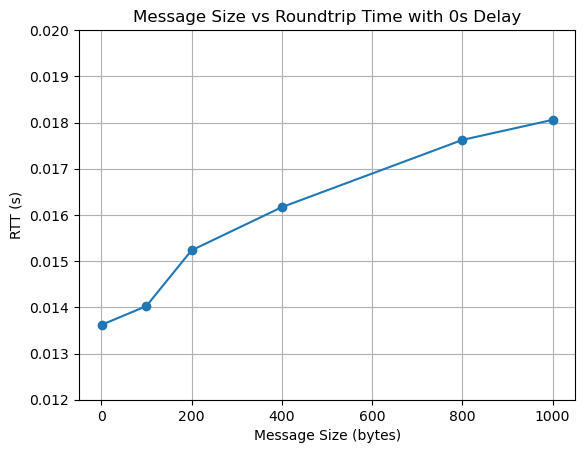

msg_size: 1, RTT: 0.114632175
msg_size: 100, RTT: 0.11586967
msg_size: 200, RTT: 0.1159428025
msg_size: 400, RTT: 0.11750005999999999
msg_size: 800, RTT: 0.12109631750000001
msg_size: 1000, RTT: 0.122279285


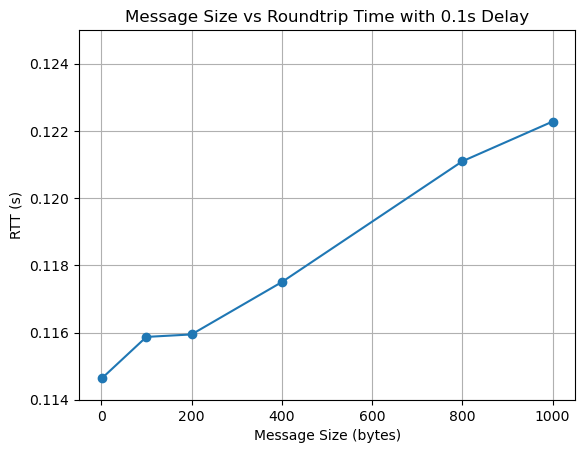

msg_size: 1, RTT: 0.22055361166666665
msg_size: 100, RTT: 0.22553099
msg_size: 200, RTT: 0.22751374166666669
msg_size: 400, RTT: 0.23327967666666663
msg_size: 800, RTT: 0.24874259666666668
msg_size: 1000, RTT: 0.251510105


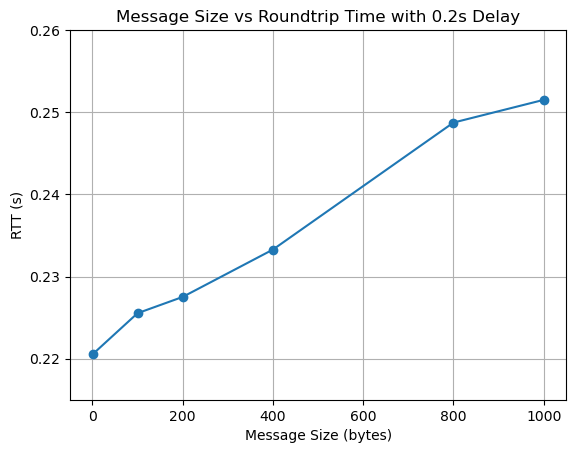

In [7]:
l0 = [
    "./data/rtt/log_client_rtt_0_delay.txt",
    "./data/rtt/log_client_rtt_0_delay_1.txt",
    "./data/rtt/log_client_rtt_0_delay_2.txt",
    "./data/rtt/log_client_rtt_0_delay_3.txt",
    "./data/rtt/log_client_rtt_0_delay_4.txt",
    "./data/rtt/log_client_rtt_0_delay_5.txt",
]
data_0 = read_data(l0, "RTT")
plot_rtt(data_0, [0.012, 0.02], "0")

l100 = [
    "./data/rtt/log_client_rtt_100_delay.txt",
    "./data/rtt/log_client_rtt_100_delay_1.txt",
    "./data/rtt/log_client_rtt_100_delay_2.txt",
    "./data/rtt/log_client_rtt_100_delay_3.txt",
]
data_100 = read_data(l100, "RTT")
plot_rtt(data_100, [0.114, 0.125], "0.1")

l200 = [
    "./data/rtt/log_client_rtt_200_delay.txt",
    "./data/rtt/log_client_rtt_200_delay_1.txt",
    "./data/rtt/log_client_rtt_200_delay_2.txt",
    "./data/rtt/log_client_rtt_200_delay_3.txt",
]
data_200 = read_data(l200, "RTT")
plot_rtt(data_200, [0.215, 0.26], "0.2")

### TCP's Throughput

The following experiments are tested between the server on csa1.bu.edu and the client on my local machine.
As can be seen from the three charts below, there is generally a negative relationship between the message size and the throghput, since throughput decreases as the message size grows.

msg_size: 1000, RTT: 137767965.8952497
msg_size: 2000, RTT: 339770331.3253012
msg_size: 4000, RTT: 606878787.8787879
msg_size: 8000, RTT: 736091131.9983654
msg_size: 16000, RTT: 2070853939.0454285
msg_size: 32000, RTT: 2985578358.2089553


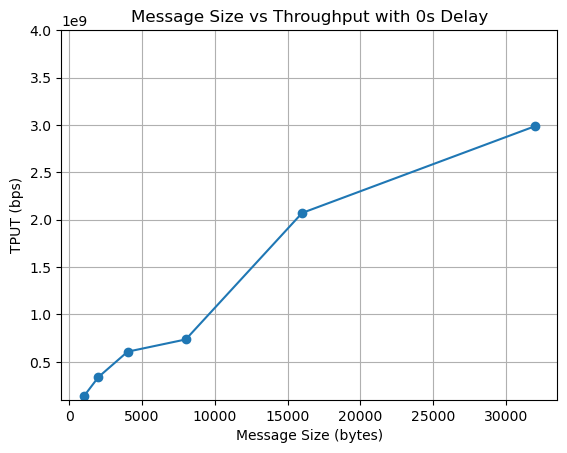

msg_size: 1000, RTT: 143971.7268969977
msg_size: 2000, RTT: 288059.7091153311
msg_size: 4000, RTT: 578790.866148812
msg_size: 8000, RTT: 1162938.519467372
msg_size: 16000, RTT: 2294549.4165209164
msg_size: 32000, RTT: 4583958.216631869


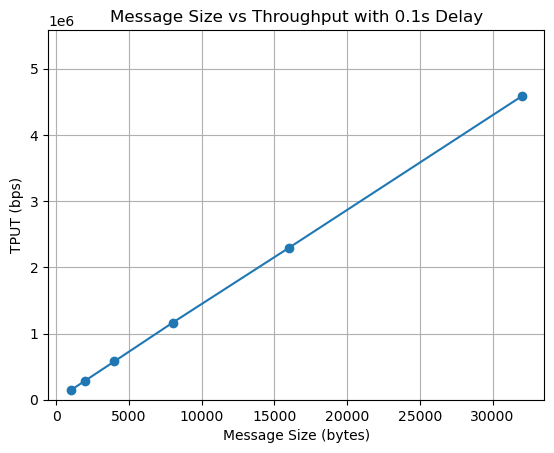

msg_size: 1000, RTT: 73706.33913941337
msg_size: 2000, RTT: 147347.0092849695
msg_size: 4000, RTT: 294756.96528355824
msg_size: 8000, RTT: 586689.7579648041
msg_size: 16000, RTT: 1172415.9148644411
msg_size: 32000, RTT: 2340282.3659252585


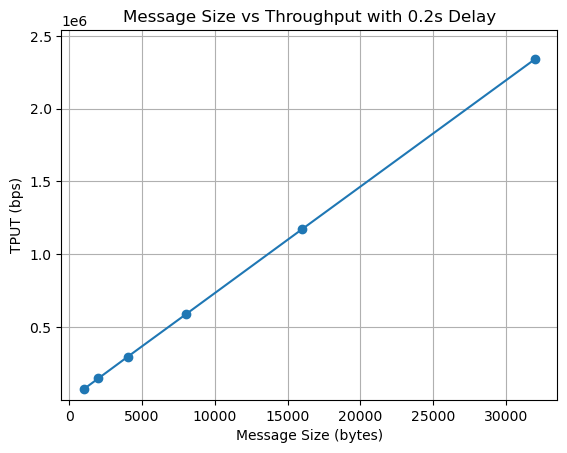

In [52]:
tput0 = ['./data/log_client_tput_0_delay_1.txt']
data_0 = read_data(tput0, "TPUT")
plot_tput(data_0, [100000000, 4000000000],'0')

tput100 = ['./data/log_client_tput_100_delay_1.txt']
data_500 = read_data(tput100, "TPUT")
plot_tput(data_500, [0, 5583958], '0.1')

tput200 = ['./data/log_client_tput_200_delay_1.txt']
data_1000 = read_data(tput200, "TPUT")
plot_tput(data_1000, [4.7, 2540282], '0.2')
